# Step response of an overdamped second order linear system

The system has the transfer function
$$ G(s) = \frac{1}{(T_1s + 1)(T_2s+2)} $$
with two real-valued poles in $-\frac{1}{T_1}$ and $-\frac{1}{T_2}$. 

The response to a unit step is 
$$ y(t) = 1 + \frac{T_1}{T_2-T_1}\mathrm{e}^{-\frac{t}{T_2}} - \frac{T_2}{T_2-T_1}\mathrm{e}^{-\frac{t}{T_1}}. $$

In [1]:
using Interact
using ControlSystems
using Gadfly
#Pkg.update()

INFO: Recompiling stale cache file /home/kjartan/.julia/lib/v0.6/Gadfly.ji for module Gadfly.


Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.1, nactions=1),"T1",2.1,"2.1",Interact.OptionDict(DataStructures.OrderedDict("0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9,"1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9,"2.0"=>2.0,"2.1"=>2.1,"2.2"=>2.2,"2.3"=>2.3,"2.4"=>2.4,"2.5"=>2.5,"2.6"=>2.6,"2.7"=>2.7,"2.8"=>2.8,"2.9"=>2.9,"3.0"=>3.0,"3.1"=>3.1,"3.2"=>3.2,"3.3"=>3.3,"3.4"=>3.4,"3.5"=>3.5,"3.6"=>3.6,"3.7"=>3.7,"3.8"=>3.8,"3.9"=>3.9,"4.0"=>4.0),Dict(0.6=>"0.6",3.4=>"3.4",0.3=>"0.3",1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",3.6=>"3.6",3.8=>"3.8",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",0.7=>"0.7",1.4=>"1.4",0.2=>"0.2",3.5=>"3.5",0.9=>"0.9",0.8=>"0.8",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9",3.7=>"3.7",0.5=>"0.5",3.0=>"3.0",4.0=>"4.0",1.6=>"1.6",2.7=>"2.7",1.9=>"1.9",0.4=>"0.4",3.9=>"3.9",1.1=>"1.1",1.3=>"1.3",2.5=>"2.5",2.4=>"2.4",3.1=>"3.1",1.8=>"1.8",3.2=>"3.2",3.3=>"3.3",1.7=>"1.7",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"T2",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9,"1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9,"2.0"=>2.0,"2.1"=>2.1,"2.2"=>2.2,"2.3"=>2.3,"2.4"=>2.4,"2.5"=>2.5,"2.6"=>2.6,"2.7"=>2.7,"2.8"=>2.8,"2.9"=>2.9,"3.0"=>3.0,"3.1"=>3.1,"3.2"=>3.2,"3.3"=>3.3,"3.4"=>3.4,"3.5"=>3.5,"3.6"=>3.6,"3.7"=>3.7,"3.8"=>3.8,"3.9"=>3.9,"4.0"=>4.0),Dict(0.6=>"0.6",3.4=>"3.4",0.3=>"0.3",1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",3.6=>"3.6",3.8=>"3.8",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",0.7=>"0.7",1.4=>"1.4",0.2=>"0.2",3.5=>"3.5",0.9=>"0.9",0.8=>"0.8",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9",3.7=>"3.7",0.5=>"0.5",3.0=>"3.0",4.0=>"4.0",1.6=>"1.6",0.1=>"0.1",2.7=>"2.7",1.9=>"1.9",0.4=>"0.4",3.9=>"3.9",1.1=>"1.1",1.3=>"1.3",2.5=>"2.5",2.4=>"2.4",3.1=>"3.1",1.8=>"1.8",3.2=>"3.2",3.3=>"3.3",1.7=>"1.7",1.0=>"1.0")),Any[],Any[],true,"horizontal")

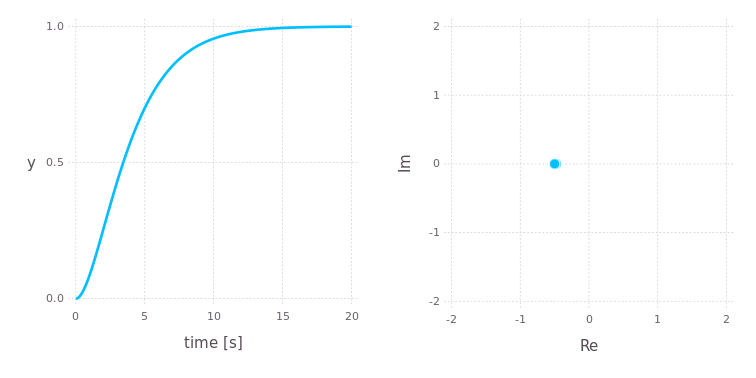

In [8]:
set_default_plot_size(20cm, 10cm)

N = 1200; # Number of samples

t = collect(linspace(0, 20, N)); # 60 values per second 

# The input step
u = ones(N);

@manipulate for T1 in 0.2:0.1:4.0, T2 in 0.1:0.1:4.0
    G = minreal(zpk([], [-1/T1, -1/T2], 1/T1/T2));
    yr, t_out, x = lsim(G, u, t);
    stp = plot(x=t, y=yr, Geom.line, Guide.xlabel("time [s]"), Guide.ylabel("y"), style(line_width=2pt))
    pp = plot(x = [-1/T1, -1/T2], y=[0,0], Geom.point, style(default_point_size=4pt),
    Guide.xlabel("Re"), Guide.ylabel("Im"), 
    Coord.cartesian(xmin=-2, xmax=2, ymin=-2, ymax=2, aspect_ratio=1))
    fig1 = hstack(stp, pp)

end